# 1. 디렉토리 확인 및 raw 데이터 압축풀기

In [ ]:
!dir

BertSentimentAnalyze.ipynb   school_violence_model_kcbert.ipynb
bert_test.ipynb		     Sentiment_Anaylze_Child_Model
DataSet			     UnSmileTest.ipynb
gpt_version.ipynb	     wandb
korean_unsmile_dataset-main  whisper_test.ipynb
model_output		     학교폭력_SAMPLE.mp3
school_violence_kcbert_base


In [ ]:
# 현재 작업 디렉토리 내부 확인하기
!ls

myfood	myfood.zip


In [ ]:
# 작업 디렉토리 변경하기
%cd /content/drive/MyDrive/Colab Notebooks/SafeVoice/ML

/content/drive/MyDrive/Colab Notebooks/SafeVoice/ML


In [2]:
# 현재 작업 디렉토리 확인하기
!cd

c:\Users\smhrd\test\ML\semtiment_dataset


In [ ]:
# zip 파일 압축풀기
# !unzip "압출풀 파일의 위치" -d "압축을 풀어줄 위치"
#!unzip "./sentiment_dataset/raw/134-2.감정이 태깅된 자유대화 (청소년).zip" -d "./sentiment_dataset/raw"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./sentiment_dataset/raw/1_8652G2A1_8651G2A1_T2_1D05T0169C000222_039370.json  
  inflating: ./sentiment_dataset/raw/1_8652G2A1_8651G2A1_T2_1D09T0393C000370_039417.json  
  inflating: ./sentiment_dataset/raw/1_8652G2A1_8651G2A1_T2_1D10T0426C000221_039336.json  
  inflating: ./sentiment_dataset/raw/1_8654G2A1_8655G2A1_T1_1D01T0028C000371_038630.json  
  inflating: ./sentiment_dataset/raw/1_8654G2A1_8655G2A1_T1_1D03T0099C000110_038680.json  
  inflating: ./sentiment_dataset/raw/1_8655G2A1_8654G2A1_T1_1D05T0179C000167_038635.json  
  inflating: ./sentiment_dataset/raw/1_8655G2A1_8654G2A1_T1_1D05T0179C000469_038641.json  
  inflating: ./sentiment_dataset/raw/1_8655G2A1_8654G2A1_T1_1D05T0181C000426_038665.json  
  inflating: ./sentiment_dataset/raw/1_8656G1A1_8657G2A1_T1_1D05T0190C000760_039784.json  
  inflating: ./sentiment_dataset/raw/1_8656G1A1_8657G2A1_T1_1D10T0417C000599_039150.json  
  inflating: ./sentiment_dataset/raw/1_8658G1A1_8659G1

# 2. rawdata preprocessing

In [4]:
import os
import json
import pandas as pd
from glob import glob
import tqdm

# 병합 함수 정의
def load_conversation_emotion_data(folder_path):
    all_data_list = []
    json_files = glob(os.path.join(folder_path, "*.json"))

    for file_path in tqdm.tqdm(json_files):
        with open(file_path, encoding="utf-8") as f:
            json_file = json.load(f)

        # 각 대화의 utterance 수집
        for utterance in json_file.get("Conversation", []):
            text = utterance.get("Text", "").strip()
            label = utterance.get("VerifyEmotionCategory", "").strip()

            # 4글자 초과 & 유효한 라벨만
            if len(text) > 4 and label in ["부정", "중립", "긍정"]:
                all_data_list.append({
                    "text": text,
                    "부정": 1 if label == "부정" else 0,
                    "중립": 1 if label == "중립" else 0,
                    "긍정": 1 if label == "긍정" else 0
                })
    # 중복 제거
    df_result = pd.DataFrame(all_data_list).drop_duplicates(subset="text").reset_index(drop=True)

    return df_result

# Colab 기준: sentiment_dataset/raw 폴더 내 모든 JSON 병합
folder_path = "./raw"
emotion_df = load_conversation_emotion_data(folder_path)

# 데이터 확인
print(f"총 수집 문장 수: {len(emotion_df)}")
print(emotion_df[["부정", "중립", "긍정"]].sum())
emotion_df.head()

100%|██████████| 10588/10588 [02:07<00:00, 83.32it/s]


총 수집 문장 수: 2096537
부정     315125
중립     378844
긍정    1402568
dtype: int64


,text,부정,중립,긍정
0,안녕하세요 잘 들리시나요,0,1,0
1,잘 달립니다.,0,0,1
2,지금 통화 문제로 몇 분을 안 남았는지 모르겠네요,0,1,0
3,원래 같았으면 진짜 끝나는 거였는데 지금,0,1,0
4,이것 때문에 한 이십 분 삼십 분 사십 분 걸리는 것 같습니다 그렇게 생각하시죠.,0,1,0


In [5]:
# 긍정 다운 샘플링
negative_df = emotion_df[emotion_df["부정"] == 1]
neutral_df = emotion_df[emotion_df["중립"] == 1]
positive_df = emotion_df[emotion_df["긍정"] == 1]

positive_df_sampled = positive_df.sample(n=len(neutral_df), random_state=42) if len(positive_df) > len(neutral_df) else positive_df
positive_df_sampled

,text,부정,중립,긍정
839644,일부러 잘하나,0,0,1
656301,나 이거 들어본 거 같애,0,0,1
1775649,그냥 안 먹으면 안 되는 거야,0,0,1
2037636,네 너가 이게에,0,0,1
1585935,진짜 안 신선하니까,0,0,1
...,...,...,...,...
1152230,스트리머그는 틈,0,0,1
66218,이 킬드 씨 이런 거는,0,0,1
1412130,내 친구가 내 머리를,0,0,1
1212391,프린트해야죠,0,0,1


In [6]:
# 최종 병합 및 셔플
final_df = pd.concat([negative_df, neutral_df, positive_df_sampled], ignore_index=True)
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 7:2:1 비율 분할
train_end = int(0.7 * len(final_df))
valid_end = int(0.9 * len(final_df))

train_df = final_df[:train_end]
valid_df = final_df[train_end:valid_end]
test_df = final_df[valid_end:]

In [7]:
# 파일 저장
train_df.to_csv("./Train.csv", index=False)
valid_df.to_csv("./Valid.csv", index=False)
test_df.to_csv("./Test.csv", index=False)

# 3. KcBert Model Fine-Tuning (Sentiment analyze)

In [ ]:
!pip install transformers
!pip install datasets
!pip install accelerate
!pip install scikit-learn

In [3]:
from datasets import load_dataset
from transformers import BertForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding
import numpy as np
from sklearn.metrics import label_ranking_average_precision_score

c:\Users\smhrd\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
!pip install datasets
from datasets import load_dataset

### CSV를 HuggingFace Dataset으로 불러오기

In [16]:
# 파일 불러오기
data_files = {
    "train": "./Train.csv",
    "validation": "./Valid.csv",
    "test": "./Test.csv"
}
dataset = load_dataset("csv", data_files=data_files)

Generating train split: 750969 examples [00:01, 382705.51 examples/s]
Generating validation split: 214562 examples [00:00, 371348.52 examples/s]
Generating test split: 107282 examples [00:00, 374032.71 examples/s]


In [13]:
import pandas as pd

def sample_csv(input_file, n_samples, output_file=None, random_state=42):
    """
    input_file: 원본 CSV 파일 경로
    n_samples: 샘플링할 행(row) 개수
    output_file: 저장할 CSV 파일명 (기본값: sampled_{n_samples}_원본파일명.csv)
    random_state: 랜덤 시드 (기본값: 42)
    """
    # CSV 파일 읽기
    df = pd.read_csv(input_file)
    # 샘플링 (중복 없이)
    sampled_df = df.sample(n=n_samples, random_state=random_state)
    # 출력 파일명 자동 생성
    if output_file is None:
        import os
        base = os.path.basename(input_file)
        output_file = f"sampled_{n_samples}_{base}"
    # 저장
    sampled_df.to_csv(output_file, index=False)
    print(f"샘플링 완료: {output_file} 에 {n_samples}개 행 저장됨.")
    return sampled_df

# 사용 예시
# 샘플링하고, 결과 DataFrame을 바로 확인할 수 있습니다.
train_path = "./Train.csv"
valid_path = "./Valid.csv"
test_path = "./Test.csv"

train_sampled = sample_csv(train_path, 10000)  # 파일명과 샘플 개수만 바꿔서 사용하세요
valid_sampled = sample_csv(valid_path, 10000)
test_sampled = sample_csv(test_path, 10000)

train_sampled.to_csv("./Train_sampled.csv", index=False)
valid_sampled.to_csv("./Valid_sampled.csv", index=False)
test_sampled.to_csv("./Test_sampled.csv", index=False)


샘플링 완료: sampled_10000_Train.csv 에 10000개 행 저장됨.
샘플링 완료: sampled_10000_Valid.csv 에 10000개 행 저장됨.
샘플링 완료: sampled_10000_Test.csv 에 10000개 행 저장됨.


In [ ]:
.# test sampled 파일 불러오기
data_files = {
    "train": "./Train_sampled.csv",
    "validation": "./Valid_sampled.csv",
    "test": "./Test_sampled.csv"
}
dataset = load_dataset("csv", data_files=data_files)

### KcBERT 토크나이저 및 전처리 함수 정의

In [26]:
# KcBERT 토크나이저
model_name = "beomi/kcbert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# unsmile 라벨들
label_names = ["부정", "중립", "긍정"]

# 전처리 함수
def preprocess_function(examples):
    tokenized = tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=128,
    )
    labels = [
        [examples[label][i] for label in label_names]
        for i in range(len(examples["text"]))
    ]
    # 👇 float32로 확실하게 지정
    tokenized["labels"] = np.array(labels, dtype=np.float32)
    return tokenized

# 전처리 적용
tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map: 100%|██████████| 214562/214562 [00:21<00:00, 9796.43 examples/s] 


### 다중 레이블 평가 지표
- lrap 점수가 높을 수록 좋은 모델

In [27]:
def compute_metrics(x):
    return {
        'lrap': label_ranking_average_precision_score(x.label_ids, x.predictions),
    }

### Trainer용 모델 및 설정 불러오기

In [28]:
batch_size = 128

# 다중 라벨 classification 설정
model = BertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_names),
    problem_type="multi_label_classification"
)

# 학습 설정
training_args = TrainingArguments(
    output_dir="./model_output/child_sentiment_analyze_kcbert_base", # 학습 결과(모델 가중치, 로그, 체크포인트 등)를 저장할 폴더 경로
    eval_strategy="epoch", # 매번 에포크 마다 검증결과 출력
    logging_strategy="epoch", #매번 에포크 마다 학습 로그(손실, 메트릭 등) 출력
    save_strategy="epoch", # 매번 에포크 마다 파일 저장
    learning_rate=2e-5, # 학습률 (learning rate): 모델이 얼마나 빠르게 학습할지 조절하는 값
    per_device_train_batch_size=batch_size, # 훈련시 배치사이즈 설정
    per_device_eval_batch_size=batch_size, # 검증시 배치사이즈 설정
    num_train_epochs=5, # 학습 횟수 설정
    load_best_model_at_end=True, # 학습 종료시 베스트모델 로딩
    metric_for_best_model='lrap', # 어떤 평가 기준으로 “가장 좋은 모델”을 판단할지 지정
    greater_is_better=True, # 베스트 모델 저장
    weight_decay=0.01, # 가중치 감소(정규화 계수) 값
    fp16=True # A100에서 속도 향상 위해 추가
)

# 패딩 정리 도구
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 다중 레이블 평가 지표
- lrap 점수가 높을 수록 좋은 모델

In [29]:
num_labels=len(label_names) # Label 갯수

model = BertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    problem_type="multi_label_classification"
)
model.config.id2label = {i: label for i, label in zip(range(num_labels), label_names)}
model.config.label2id = {label: i for i, label in zip(range(num_labels), label_names)}

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Trainer 정의 및 학습

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# 학습 시작!
trainer.train()

# 모델 저장
trainer.save_model("./model_output/child_sentiment_analyze_kcbert_base")

In [ ]:
print(trainer.state.best_model_checkpoint)

./model_output/child_sentiment_analyze_kcbert_base/checkpoint-12394


# 4. Model Test

### 저장된 모델을 불러와서 사용할 경우

In [ ]:
from transformers import AutoModelForSequenceClassification

# 모델 경로 (trainer.save_model("./saved_model")에서 저장한 경로)
model_path = "../model_output/child_sentiment_analyze_kcbert_base"

# tokenizer와 model 불러오기
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "Sychol/child_sentiment_analyze_kcbert_base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [9]:
import torch

In [23]:
from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(
    model = model,
    tokenizer = tokenizer,
    device=0,
    return_all_scores=True,
    function_to_apply='sigmoid'
    )

Device set to use cuda:0
c:\Users\smhrd\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


- 모델에 문장을 넣고 예측 결과(혐오 표현 여부 등) 를 출력하는 코드입니다.
- return_all_scores=True를 설정했기 때문에 각 라벨에 대한 확률(또는 점수)이 다 나와요.
  - → 혐오 표현이 다중 레이블(여러 카테고리)로 분류되어 있기 때문에 점수가 각항목별로 나옵니다.

In [11]:
for result in pipe("이래서 여자는 게임을 하면 안된다")[0]:
    print(result)

{'label': '부정', 'score': 0.2798171043395996}
{'label': '중립', 'score': 0.44147342443466187}
{'label': '긍정', 'score': 0.2598409652709961}


# 5. Model evaluation

- 모델이 예측한 결과(output_labels)에서 점수가 일정 이상인 라벨들만 선택해서 실제 라벨처럼 반환하는 함수입니다.
- 예: 각 클래스 확률 중에서 0.5 이상인 경우만 긍정으로 간주

In [24]:
import tqdm
from transformers.pipelines.base import KeyDataset

def get_predicated_label(output_labels, min_score):
    labels = []
    for label in output_labels:
        if label['score'] > min_score:
            labels.append(1)
        else:
            labels.append(0)
    return labels

predicated_labels = []

for out in tqdm.tqdm(pipe(KeyDataset(dataset['validation'], 'text'))):
    predicated_labels.append(get_predicated_label(out, 0.5))

100%|██████████| 214562/214562 [34:17<00:00, 104.27it/s]


#### classification_report()는 micro/macro/weighted 평균도 함께 보여줍니다.
- micro는 전체 정확도 느낌
- macro는 클래스별 평균
- weighted는 클래스 비중까지 반영한 평균

In [25]:
from sklearn.metrics import classification_report
import tqdm

# label 순서 맞추기 (predicated_labels도 이 순서로 예측했어야 함!)
label_names = ["부정", "중립", "긍정"]

# 다중 라벨 형태로 정답 추출
y_true = [
    [dataset["validation"][label][i] for label in label_names]
    for i in tqdm.tqdm(range(len(dataset["validation"]["text"])), desc="진행 중")
]

# classification_report 출력 (다중 라벨)
print(classification_report(y_true, predicated_labels, target_names=label_names))

진행 중: 100%|██████████| 214562/214562 [17:52:37<00:00,  3.33it/s]   


              precision    recall  f1-score   support

          부정       0.64      0.21      0.32     63154
          중립       0.58      0.11      0.19     75347
          긍정       0.56      0.15      0.24     76061

   micro avg       0.60      0.15      0.25    214562
   macro avg       0.59      0.16      0.25    214562
weighted avg       0.59      0.15      0.24    214562
 samples avg       0.15      0.15      0.15    214562



c:\Users\smhrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 결과 시각화

#### 폰트 적용

In [ ]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

# 설치된 폰트 목록 확인
!fc-list | grep "Nanum"

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
# 또는 'AppleGothic' (맥), 'NanumGothic' (리눅스)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54800 (\N{HANGUL SYLLABLE HYEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/pyth

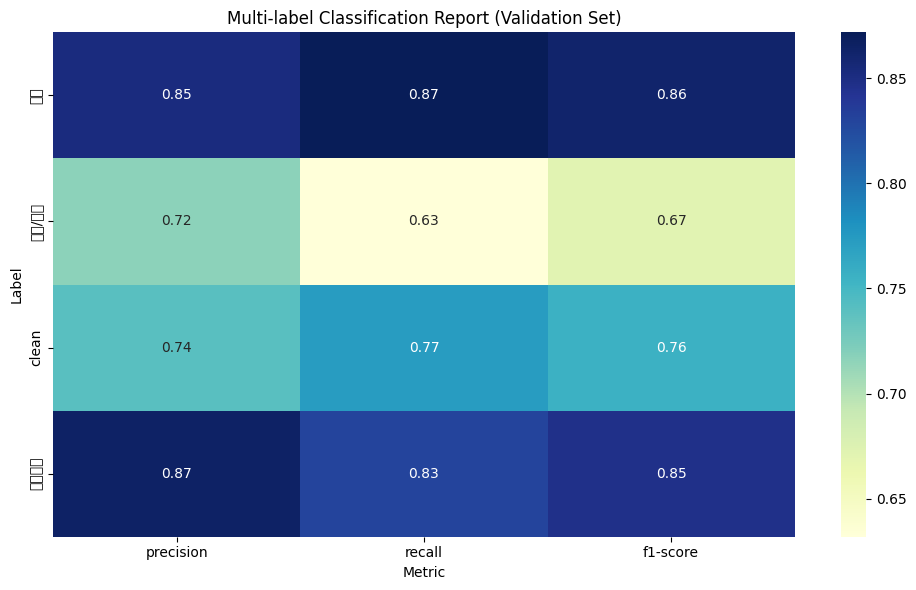

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

# 라벨 이름
label_names = ["부정", "중립", "긍정"]

# 정답값만 뽑아서 y_true 리스트로 만들기
y_true = [
    [dataset["validation"][label][i] for label in label_names]
    for i in range(len(dataset["validation"]["text"]))
]

# 예측값(y_pred)은 이미 정답 형식으로 되어 있음!
y_pred = predicated_labels

# classification_report를 딕셔너리로 출력
report_dict = classification_report(y_true, y_pred, target_names=label_names, output_dict=True)

# 딕셔너리를 데이터프레임으로 변환
df_report = pd.DataFrame(report_dict).transpose()

# precision, recall, f1-score 시각화 (원하는 메트릭만 추출, 각 라벨별)
metrics = ["precision", "recall", "f1-score"]
df_metrics = df_report.loc[label_names, metrics]

# 시각화: heatmap으로 표현
plt.figure(figsize=(10, 6))
sns.heatmap(df_metrics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Multi-label Classification Report (Validation Set)")
plt.ylabel("Label")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()


# 6. Hugging Face Pipeline 제작

In [ ]:
!dir

BertSentimentAnalyze.ipynb   school_violence_model_kcbert.ipynb
bert_test.ipynb		     Sentiment_Anaylze_Child_Model
DataSet			     UnSmileTest.ipynb
gpt_version.ipynb	     wandb
korean_unsmile_dataset-main  whisper_test.ipynb
model_output		     학교폭력_SAMPLE.mp3
school_violence_kcbert_base


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/SafeVoice/ML/model_output

/content/drive/MyDrive/Colab Notebooks/SafeVoice/ML/model_output


### 1단계: Hugging Face 로그인

In [ ]:
# 허깅페이스 로그인
import huggingface_hub
huggingface_hub.login()

### 2단계: 모델 업로드

In [ ]:
from huggingface_hub import HfApi, create_repo, upload_folder

# 사용자명과 모델 이름 설정
username = "Sychol"
model_name = "child_sentiment_analyze_kcbert_base"

# 1. 모델 저장소 만들기
create_repo(repo_id=f"{username}/{model_name}", private=False)

# 2. 모델 폴더 업로드
upload_folder(
    repo_id=f"{username}/{model_name}",
    folder_path="/content/drive/MyDrive/Colab Notebooks/SafeVoice/ML/model_output/child_sentiment_analyze_kcbert_base/checkpoint-12394",
    path_in_repo=".",
)


rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

Upload 6 LFS files:   0%|          | 0/6 [00:00<?, ?it/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/872M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Sychol/child_sentiment_analyze_kcbert_base/commit/65a1f606c06d3305da4e53c9abac22039d73130d', commit_message='Upload folder using huggingface_hub', commit_description='', oid='65a1f606c06d3305da4e53c9abac22039d73130d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Sychol/child_sentiment_analyze_kcbert_base', endpoint='https://huggingface.co', repo_type='model', repo_id='Sychol/child_sentiment_analyze_kcbert_base'), pr_revision=None, pr_num=None)

### 3단계: pipeline에서 바로 쓰기

In [ ]:
from transformers import pipeline

pipe = pipeline(
    "text-classification",
    model="Sychol/child_sentiment_analyze_kcbert_base",
    tokenizer="Sychol/child_sentiment_analyze_kcbert_base",
    top_k=None,                # 다중 라벨이므로
    function_to_apply="sigmoid"
)

print(pipe("이래서 여자는 게임을 하면 안된다"))
print(pipe("너무너무 좋은데"))
print(pipe("아 진짜 짜증나네"))

Device set to use cuda:0


[[{'label': '중립', 'score': 0.4414733946323395}, {'label': '부정', 'score': 0.2798171043395996}, {'label': '긍정', 'score': 0.2598409950733185}]]
[[{'label': '긍정', 'score': 0.7033187747001648}, {'label': '부정', 'score': 0.1578255593776703}, {'label': '중립', 'score': 0.13599060475826263}]]
[[{'label': '부정', 'score': 0.702154815196991}, {'label': '긍정', 'score': 0.16914141178131104}, {'label': '중립', 'score': 0.13172508776187897}]]
